In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Done")

Done


In [2]:
#Load Data
df = pd.read_excel('./mktgbudget.xlsx', sheet_name='mktgbudget')
df.head()

,Month,Spend,Sales
0,1,1000,9914
1,2,4000,40487
2,3,5000,54324
3,4,4500,50044
4,5,3000,34719


In [3]:
#Create new Dataset without the Months column
df1 = df.drop('Month', axis=1)
df1.head()

,Spend,Sales
0,1000,9914
1,4000,40487
2,5000,54324
3,4500,50044
4,3000,34719


In [4]:
#Show key statstics
df1.describe()

,Spend,Sales
count,12.000000,12.000000
mean,6541.666667,70870.333333
std,4293.008763,45654.491312
min,1000.000000,9914.000000
25%,3750.000000,39436.250000
50%,4750.000000,52184.000000
75%,9500.000000,100881.750000
max,15000.000000,158484.000000


In [6]:
#Define x and y variables
x=df1['Spend'].to_numpy()
y=df1['Sales'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [7]:
print(x_train)
print(x_train.shape)

[ 4000  3000  5000  1000  7000 11000  4500  3000 15000]
(9,)


In [8]:
#Change Data to 2D array 
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)
y_train2 = y_train.reshape(-1,1)
y_test2 = y_test.reshape(-1,1)

In [9]:
print(x_train2)
print(x_train2.shape)

[[ 4000]
 [ 3000]
 [ 5000]
 [ 1000]
 [ 7000]
 [11000]
 [ 4500]
 [ 3000]
 [15000]]
(9, 1)


Text(0, 0.5, 'Sales')

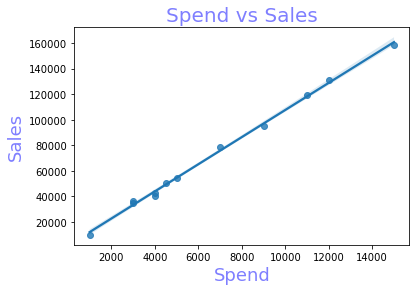

In [10]:
#Regression Line Visualization
lmgraph=sns.regplot(x=x,y=y)
lmgraph.axes.set_title("Spend vs Sales",size=20,color='blue',alpha=0.5)
lmgraph.set_xlabel("Spend",size=18,color='blue',alpha=0.5)
lmgraph.set_ylabel("Sales",size=18,color='blue',alpha=0.5)

<AxesSubplot:>

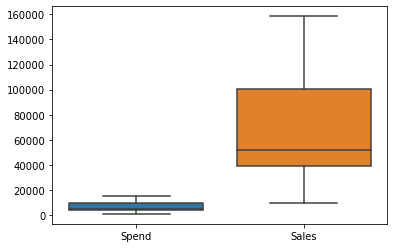

In [11]:
#Boxplot Visualization
sns.boxplot(data=df1)

In [12]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

name = 'Linear Regression'
method = LinearRegression(n_jobs=-1) #use all processors
method.fit(x_train2,y_train2)
predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
print('Coefficient: {:0.2f}'.format((float(method.coef_))))
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 2293.55
Coefficient: 10.53

R2: 0.99
Mean Absolute Error: 2936.24
Mean Squared Error: 9153580.27
Root Mean Squared Error: 3025.49


In [13]:
#Forecast Table
predict2 = predict.reshape(-1)
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble


Forecast Table


,Actual,Predicted,Difference
0,131348,128595.46,-2752.54
1,94871,97019.99,2148.99
2,40487,44394.19,3907.19
